In [55]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import StrMethodFormatter
from scipy.optimize import curve_fit

In [56]:
def readSpec(specName, delimiter):
    x = np.array([])
    y = np.array([])
    with open(specName, newline='') as f:
        fr = csv.reader(f, delimiter=delimiter, quotechar='|')
        for row in fr:
            if row != []:
                y = np.append(y, row[0])
                x = np.append(x, row[1])
                #print(y, x)
    x = x.astype(np.float)
    y = y.astype(np.float)
    return y, x

In [57]:
def func(x, a, b, c, d, e, f):
     return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5 
    
def plotSpec(specName,lg, trans):
    y, x = readSpec(specName, ',')

    if trans:
        #tx, ty = readSpec('transmission_losgatos.dat', ' ')
        #f = np.vectorize(lambda zz: min(tx, key=lambda z:abs(z-zz)))
        #x1 = f(x)
        #f = np.vectorize(lambda z: np.where(tx == z)[0][0])
        #ind = f(x1)
        #f = np.vectorize(lambda z: ty[z])
        #y1 = f(ind)
        #y11 = y / y1
        #y = y11 / max(y11)

        xmin = min(np.where(tx > min(x))[0])
        xmax = max(np.where(tx < max(x))[0])
        tx1 = tx[xmin:xmax]
        ty1 = ty[xmin:xmax]
        popt, pcov = curve_fit(func, tx1, ty1)
        y1 = func(x,*popt)
        y = y * y1

    if lg:
        f = np.vectorize(lambda x: math.log(x))
        np.place(y, y == 0, 1)
        y = f(y) / max(abs(f(y))) + 1
        
    fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
    ax.plot(x[800:], y[800:],linestyle='', marker='o', color='red')#, label='Rcm')
    # Turn off tick labels
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    ax.xaxis.set_major_locator(plt.MaxNLocator(30))
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    #plt.legend('lolo')
    plt.xlabel('wavelength, nm')
    plt.ylabel('relative Intensity')
    #plt.xticks(np.arange( 0, 600, 50))
    #plt.yticks(np.arange( -600, 700, 200))
    plt.grid(True)
    #plt.title("Linear deviation")
    plt.show()

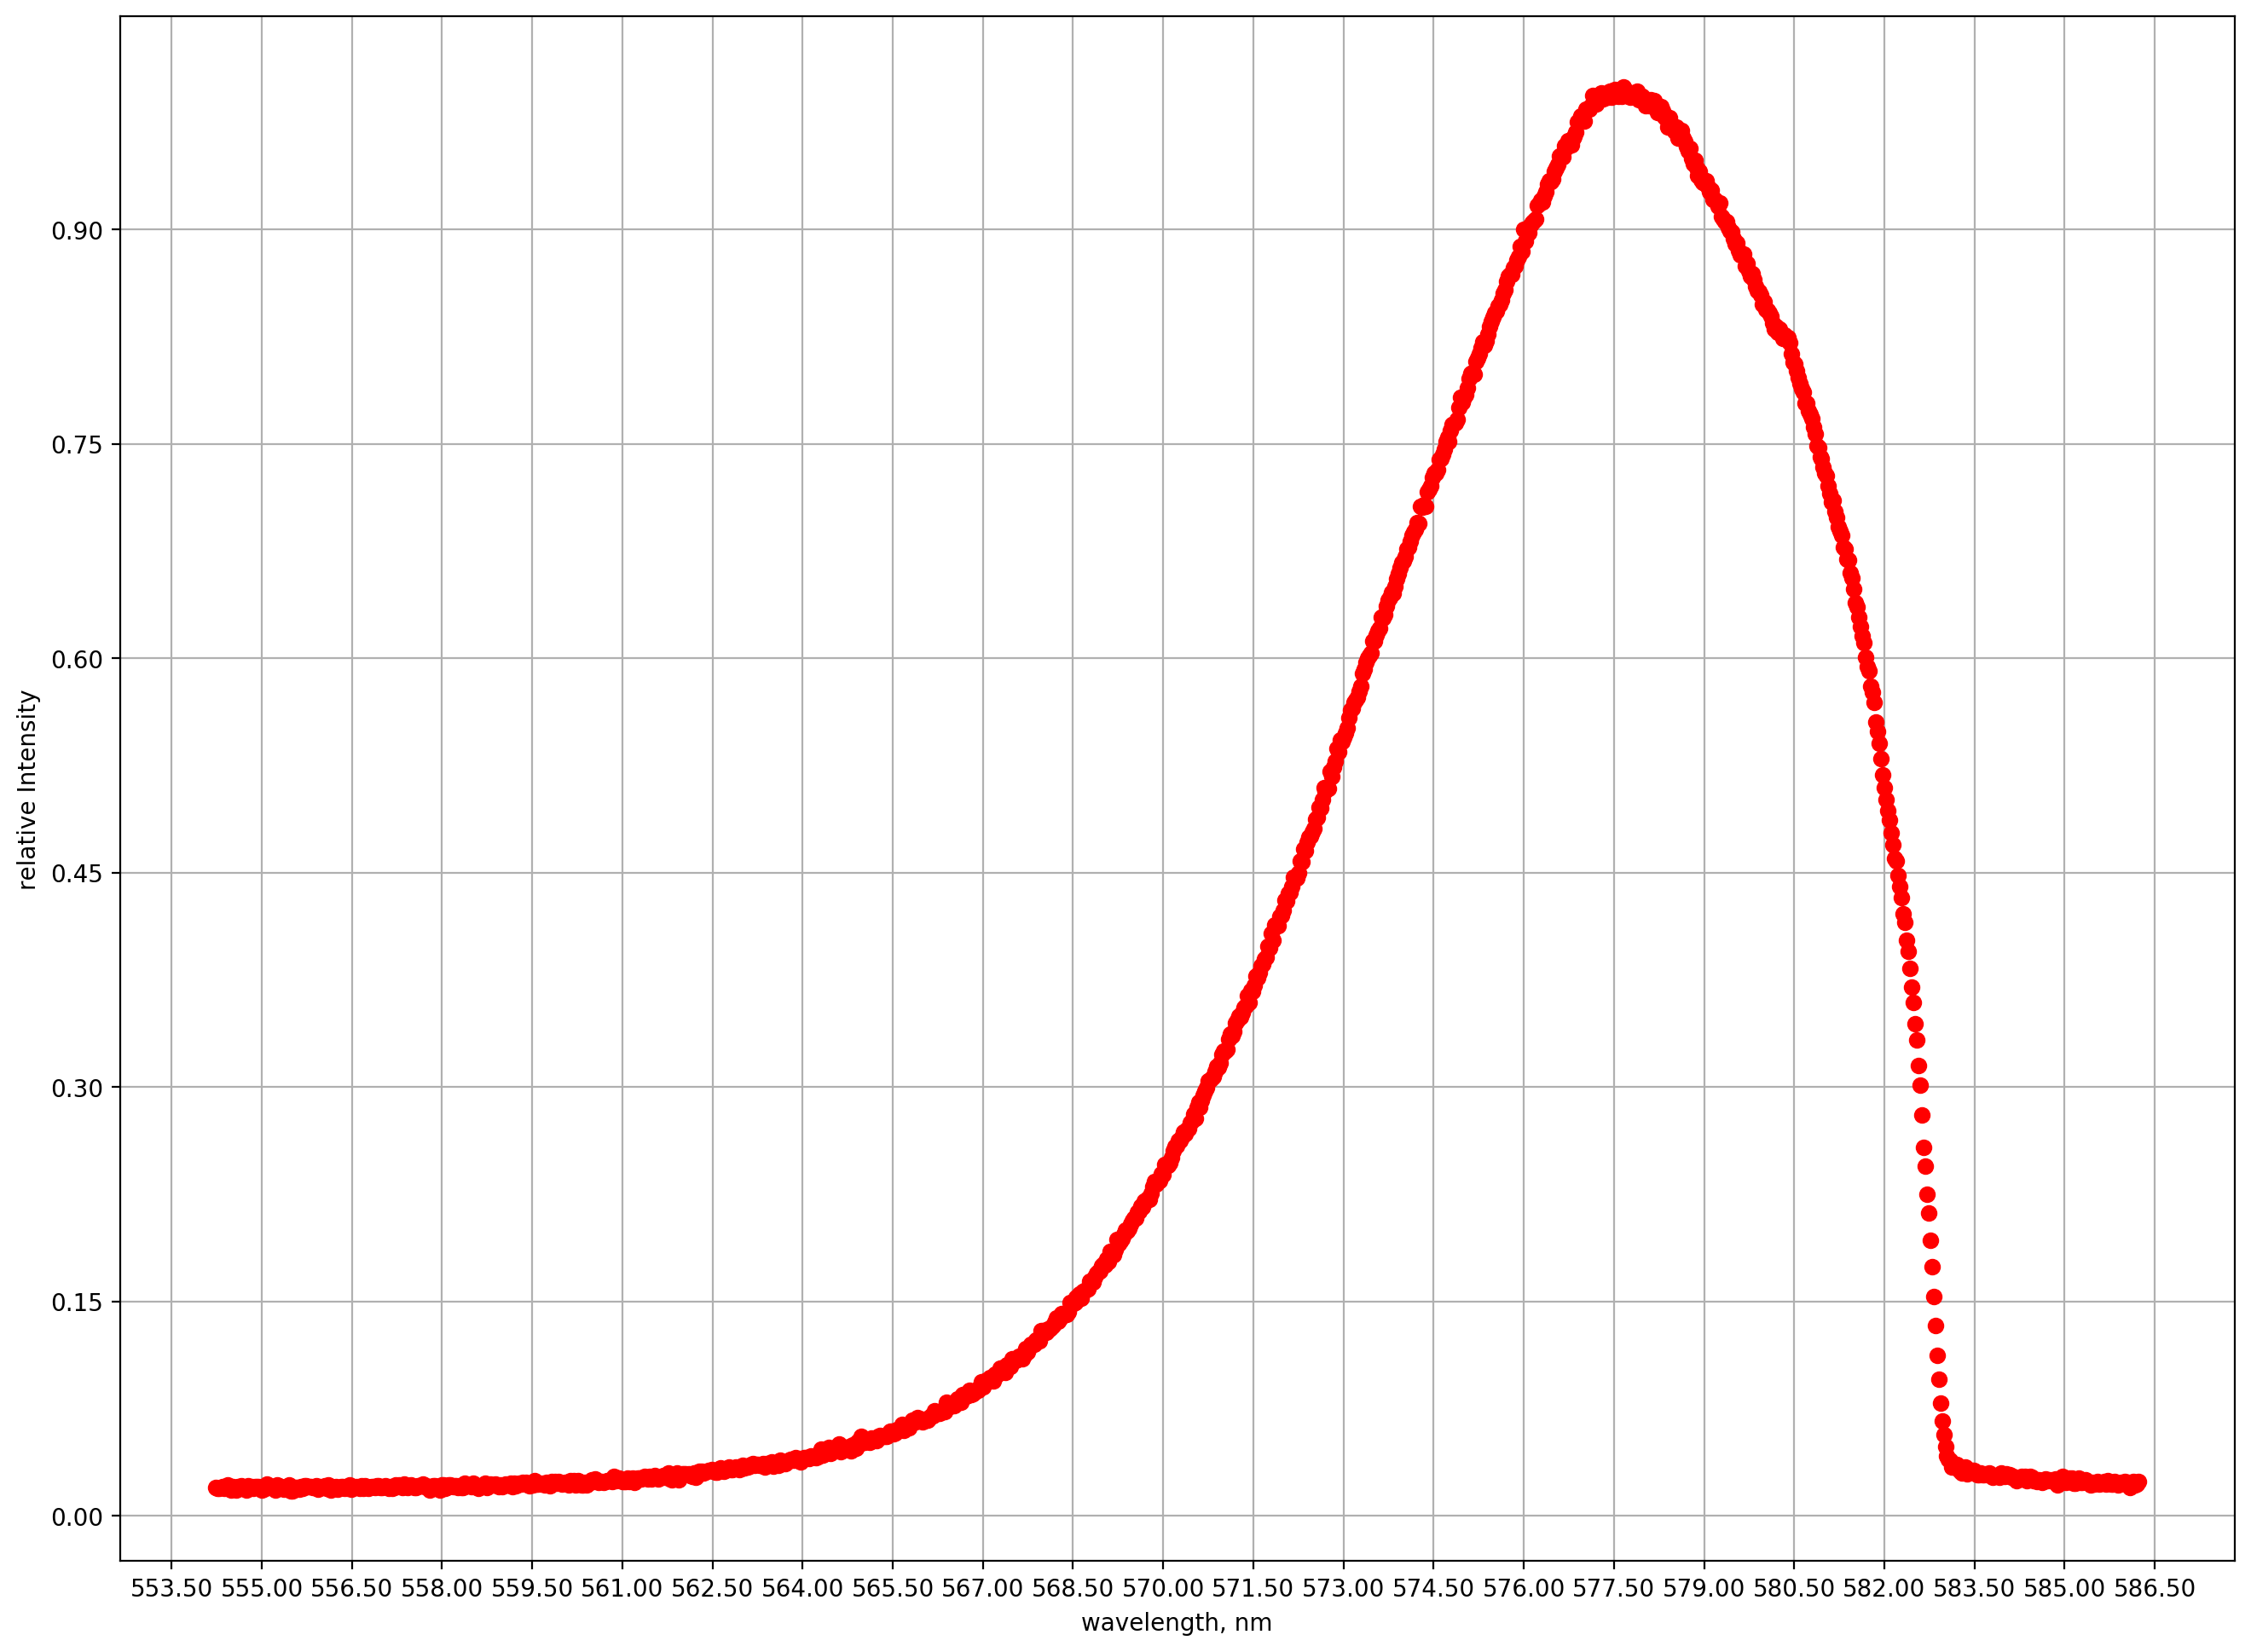

In [58]:
plotSpec('spec8.csv',False, False)

In [196]:
readSpec('transmission_losgatos.dat')

IndexError: list index out of range

In [230]:
tx, ty = readSpec('transmission_losgatos.dat', ' ')

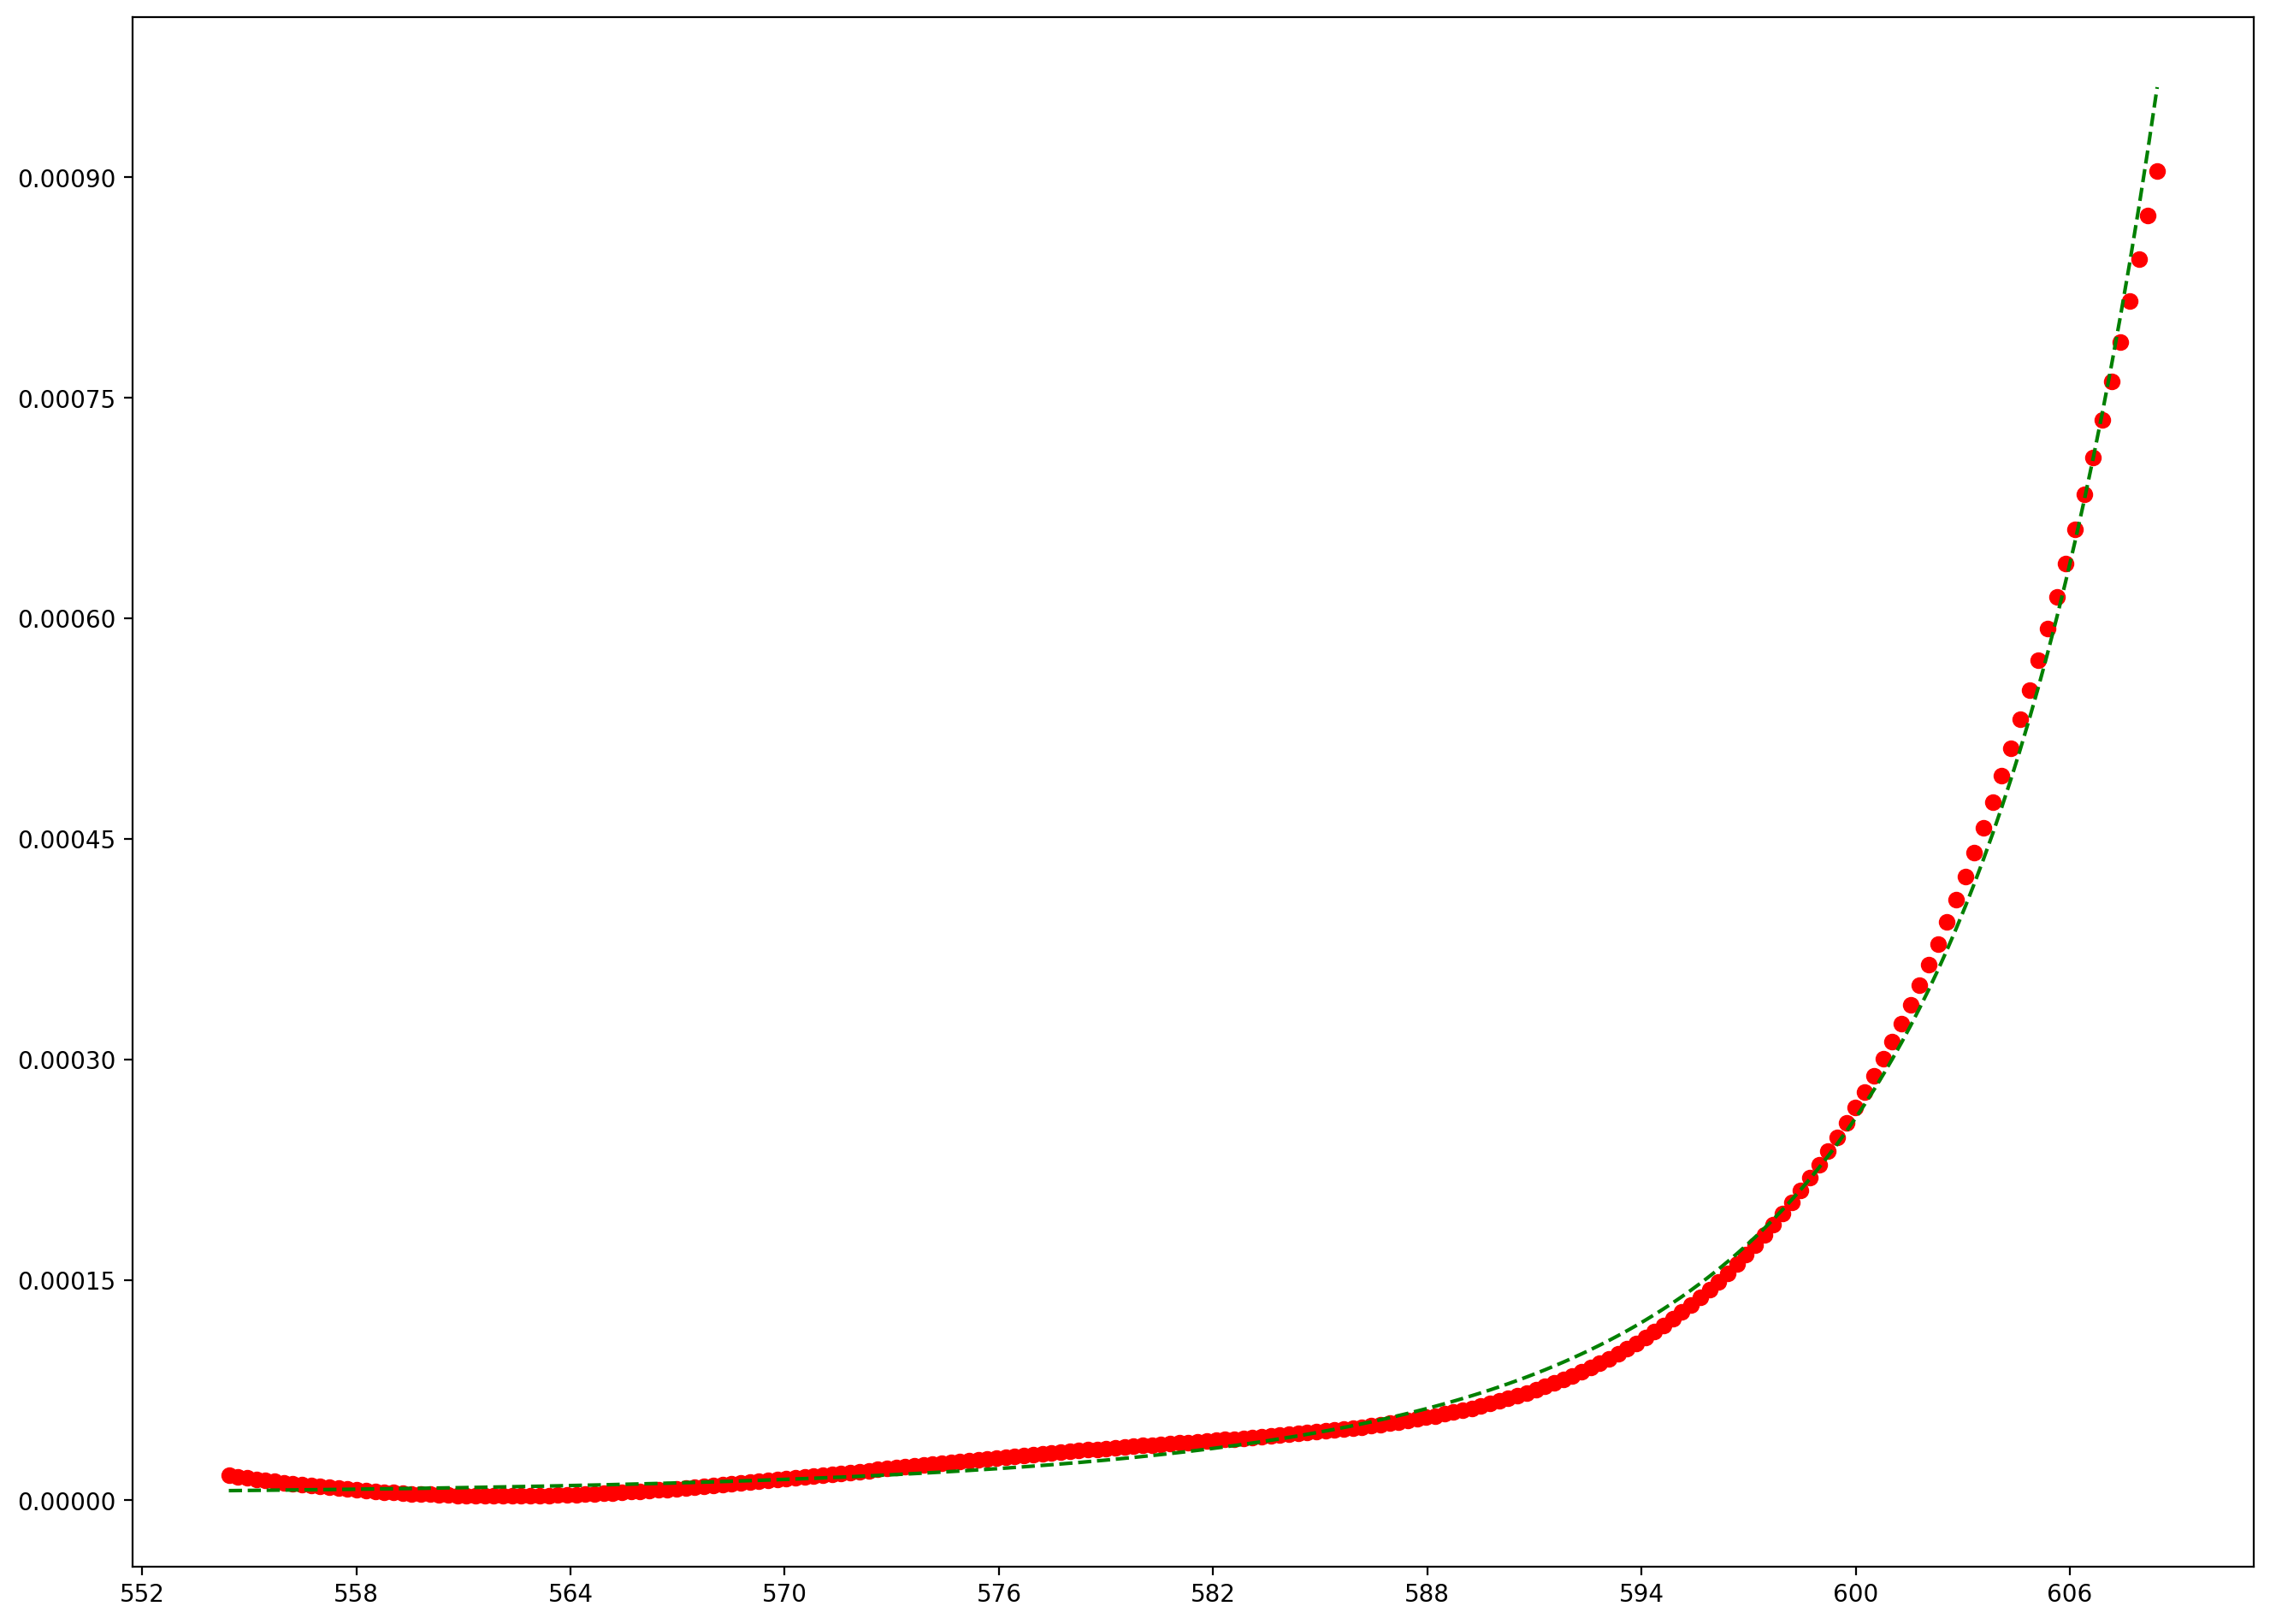

In [426]:
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(tx1[:], func(tx1,*popt),linestyle='', marker='o', color='red')
ax.plot(tx1[:],  ty1,linestyle='--', marker='', color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))

In [378]:
y, x = readSpec('spec6.csv', ',')

In [242]:
max(x)

608.7746478873239

In [335]:
f = np.vectorize(lambda zz: min(tx, key=lambda z:abs(z-zz)))
x1 = f(x)

In [336]:
f = np.vectorize(lambda z: np.where(tx == z)[0][0])
ind = f(x1)

In [339]:
min(ind)
max(ind)

685

In [395]:
def func(x, a, b, c, d, e, f, g):
     return a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4 + f * x ** 5 + g * x ** 6

In [396]:
xmin = min(np.where(tx > min(x))[0])
xmax = max(np.where(tx < max(x))[0])
tx1 = tx[xmin:xmax]
ty1 = ty[xmin:xmax]
popt, pcov = curve_fit(func, tx1, ty1)
y1 = func(x,*popt)
y111 = y / y1

In [367]:
pcov

array([[ 6.08525288e-05, -2.09409131e-07,  1.80026948e-10],
       [-2.09409131e-07,  7.20735616e-10, -6.19699323e-13],
       [ 1.80026948e-10, -6.19699323e-13,  5.32904163e-16]])

In [297]:
f = np.vectorize(lambda z: ty[z])
y1 = f(ind)

In [306]:
y11 = y / y1
y11 = y11 / max(y11)

In [301]:
y11

array([0.35950935, 0.35503699, 0.38978382, ..., 0.00217925, 0.00232513,
       0.00221965])

In [296]:
ty[ind[0]]

0.001005375

In [290]:
x1

array([608.7   , 608.7   , 608.7   , ..., 554.1721, 554.1721, 554.1721])

In [292]:
np.where(tx == x1[0])[0][0]

685

In [286]:
min(tx, key=lambda z:abs(z-x[0]))

608.7

1000

In [282]:
tx[100]

458.94

In [258]:
f = np.vectorize(lambda zz: min(tx, key=lambda z:abs(z-zz)))
x = f(x)

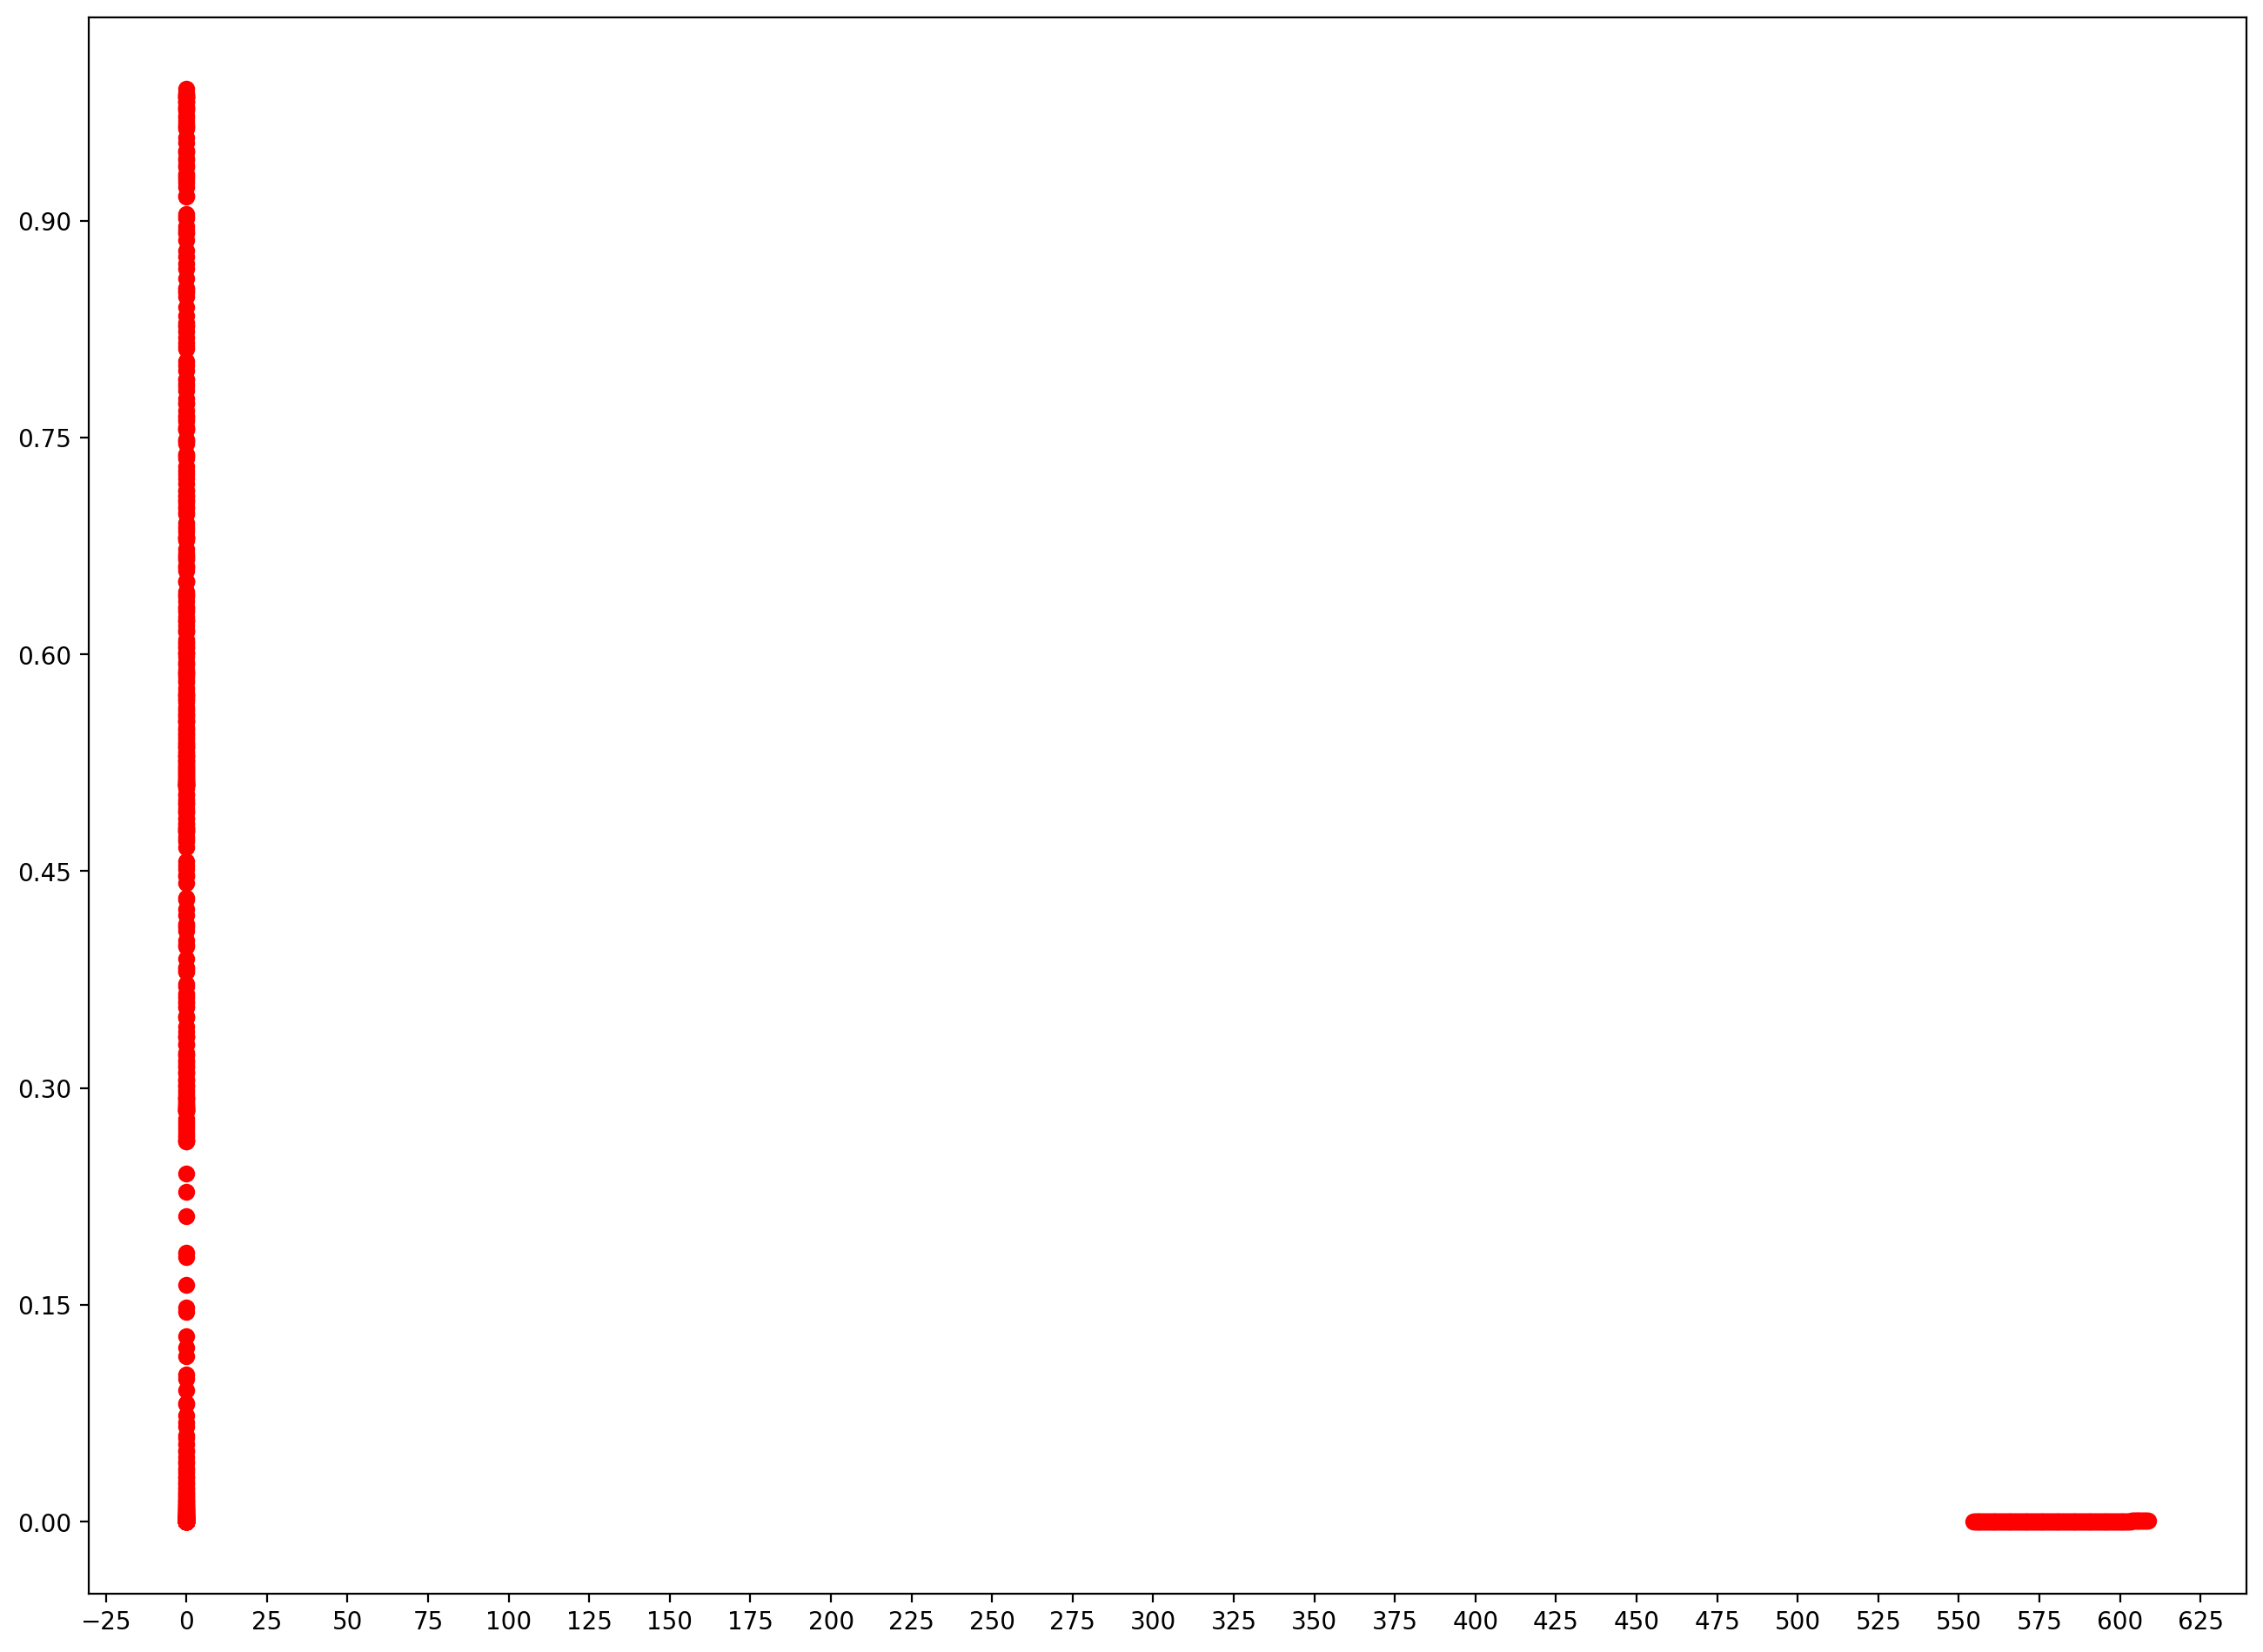

In [253]:
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(lolo, ty,linestyle='', marker='o', color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))

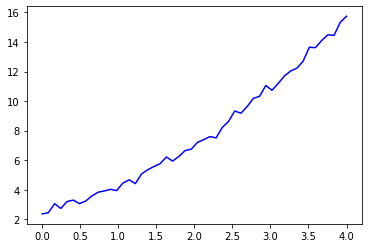

In [363]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [364]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.51653679, 1.21689294, 0.5217146 ])

In [431]:
xx, yy = readSpec('n0_n.dat', ' ')

In [435]:
type(yy[0])

numpy.float64

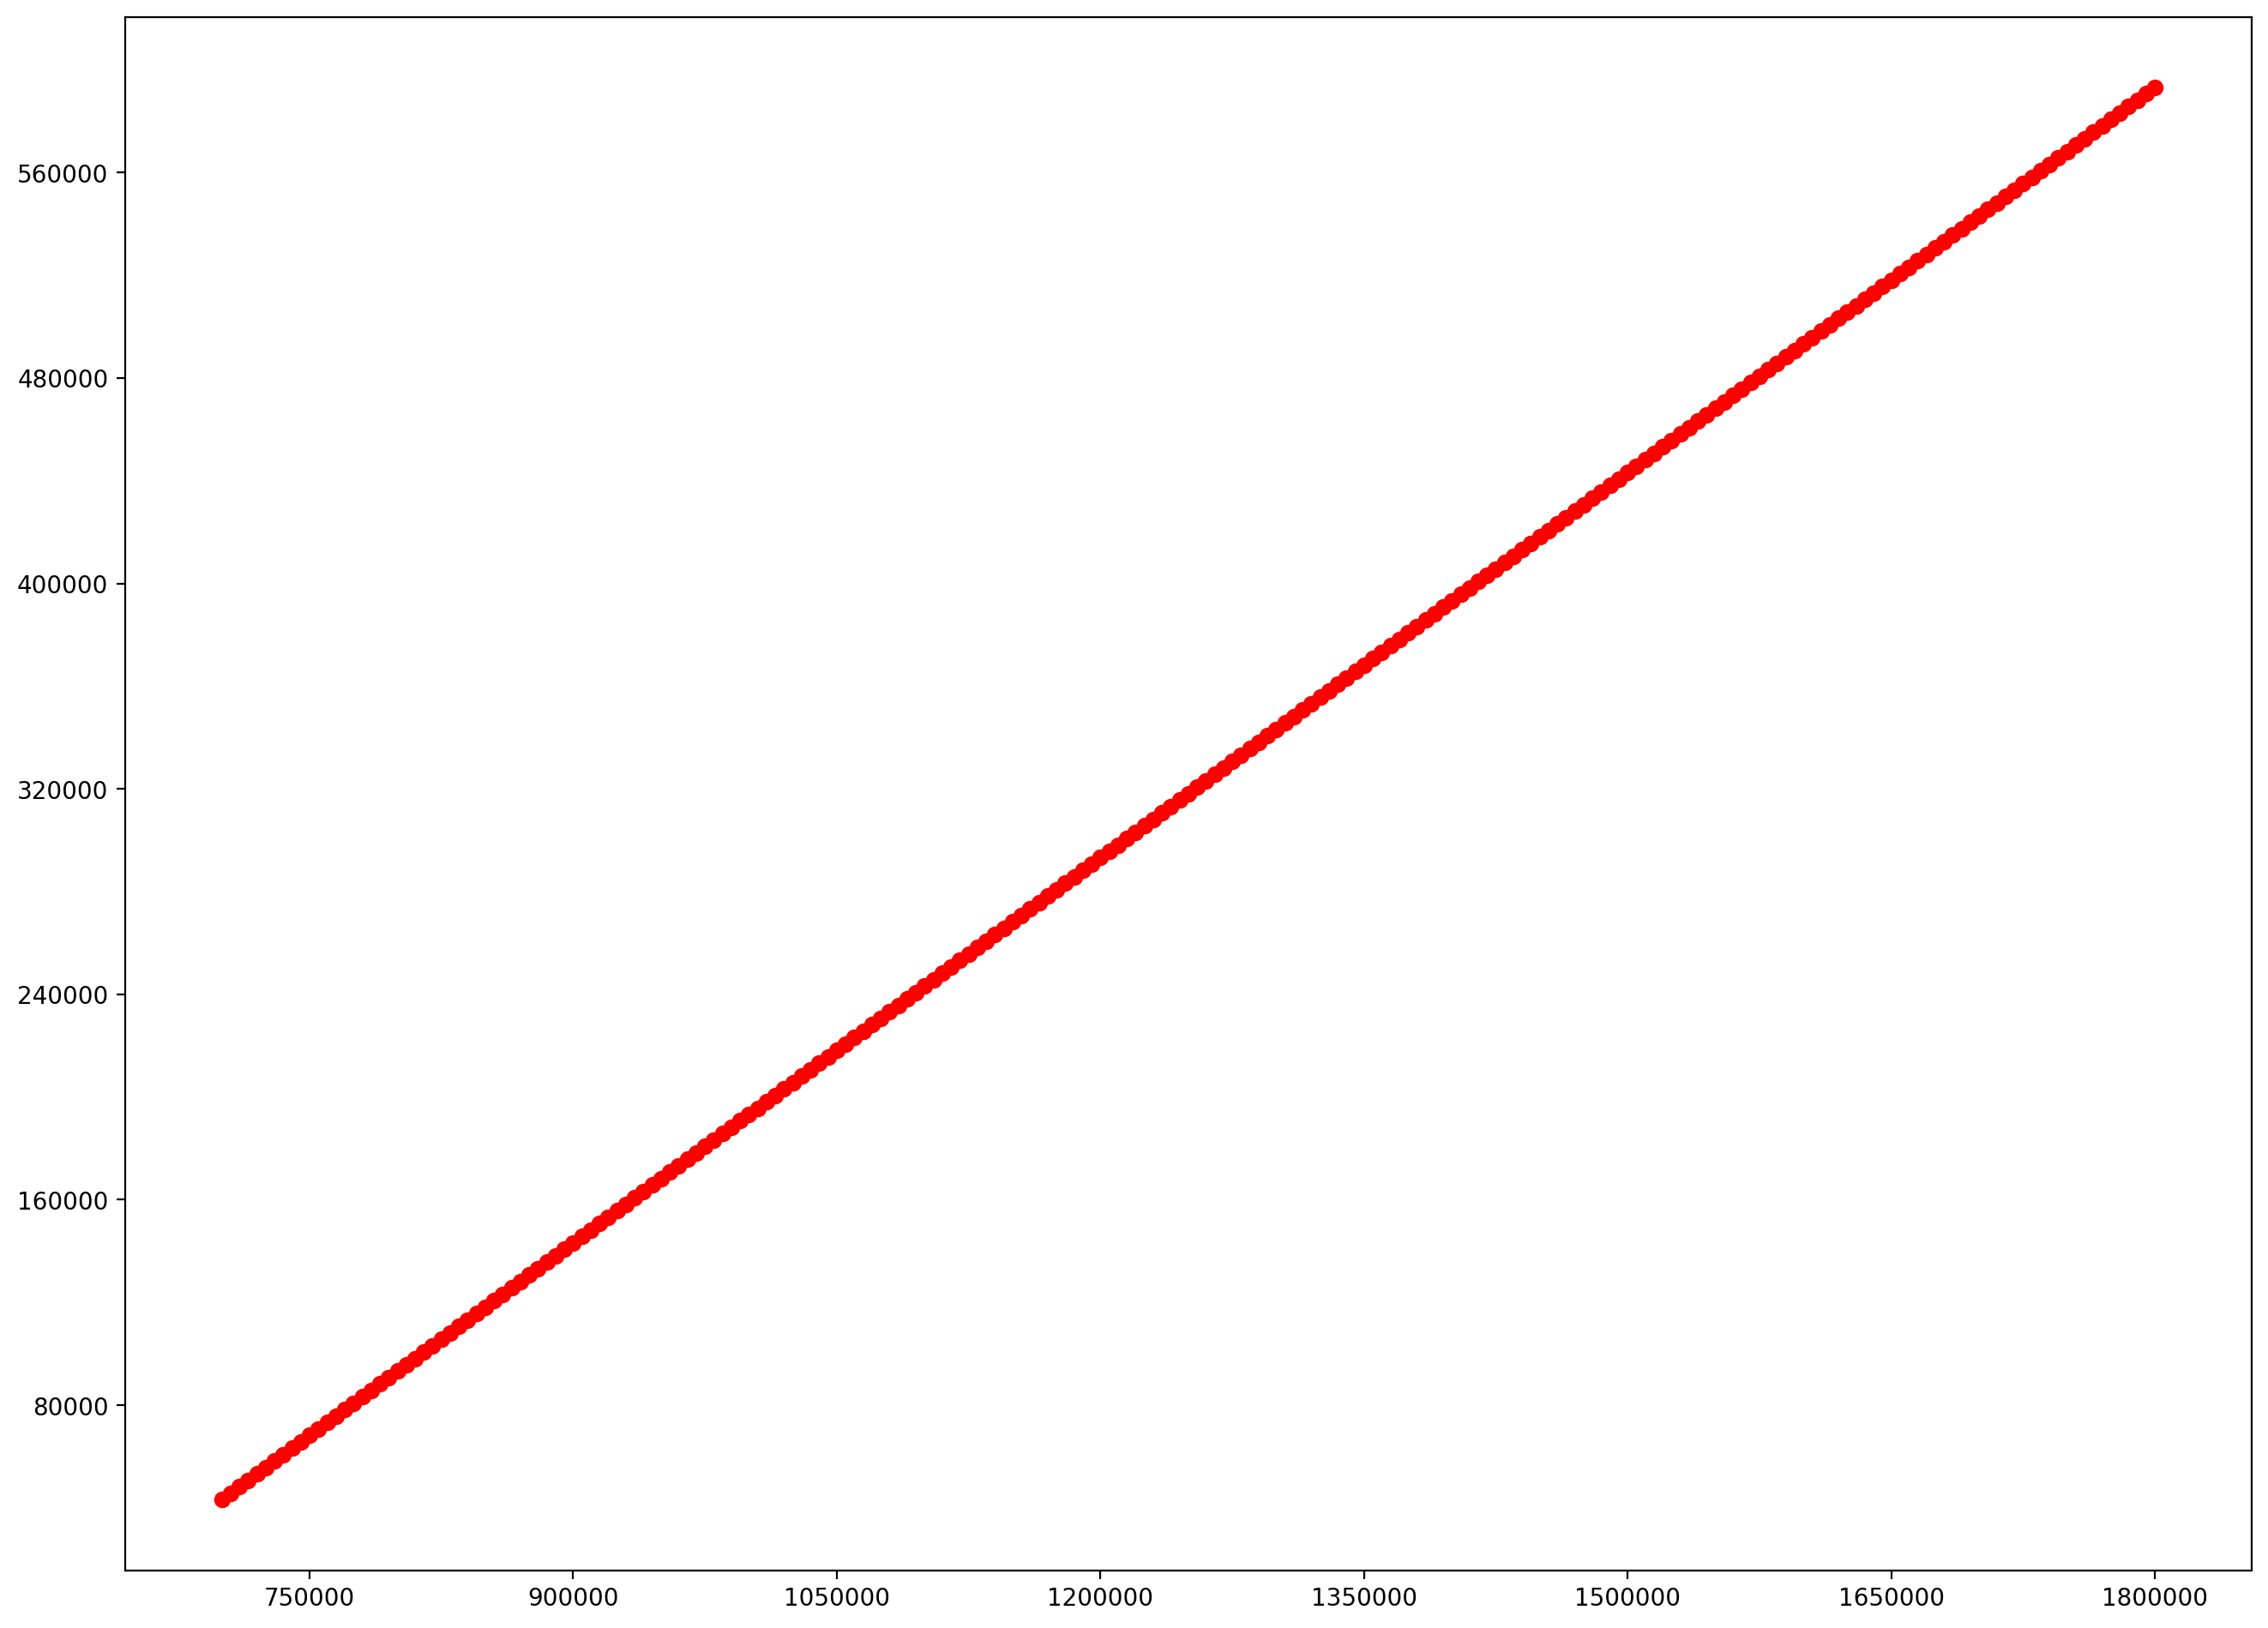

In [433]:
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(xx, yy,linestyle='', marker='o', color='red')
#ax.plot(tx1[:],  ty1,linestyle='--', marker='', color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))